In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from utils.helper import load_and_summarize, scale_dataframe, split_data, evaluate_regressor

In [2]:
df = load_and_summarize("CSV Files/Training_set_heights200.csv")

--- Loading Training_set_heights200.csv ---
First 5 rows:
   Height  Weight
0   147.5    66.0
1   137.9    64.2
2   149.7    70.3
3   162.8    74.1
4   136.5    54.1

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  200 non-null    float64
 1   Weight  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [3]:
df = scale_dataframe(df)

In [4]:
df

,Height,Weight
0,0.584270,0.587413
1,0.464419,0.545455
2,0.611735,0.687646
3,0.775281,0.776224
4,0.446941,0.310023
...,...,...
195,0.563046,0.480186
196,0.324594,0.202797
197,0.519351,0.668998
198,0.501873,0.487179


In [5]:
X = df[['Weight']]
y = df['Height']

In [6]:
X_train, X_test, y_train, y_test = split_data(df,'Height')

In [7]:
X_train.shape

(160, 1)

In [8]:
X_test.shape

(40, 1)

In [9]:
y_train.shape

(160,)

In [10]:
y_test.shape

(40,)

## Part 1 - Batch Gradient Descent
This is the classic version of the algorithm. In each step, it calculates the gradient using the **entire training dataset**. It's accurate but can be slow on very large datasets

In [11]:
def batch_gd(X,y,epochs,L):
    m=0.0 #initial slope
    n=0.0 # initial intercept
    n_samples=len(X)

    for i in range(epochs):
        y_pred= m * X + n

        m_grad = -(2/n_samples) * sum(X*(y-y_pred))
        n_grad = -(2/n_samples) * sum(y-y_pred)

        m = m - L * m_grad
        n = n - L * n_grad

    return m,n

In [12]:
epochs = 900
L = 0.5
m_batch,n_batch = batch_gd(X_train.values.flatten(), y_train.values, epochs, L)

In [13]:
print(f"--- Batch GD Final Parameters ---")
print(f"Slope (m): {m_batch:.4f}")
print(f"Intercept (n): {n_batch:.4f}")

--- Batch GD Final Parameters ---
Slope (m): 0.7972
Intercept (n): 0.0831


In [14]:
y_pred_batch = m_batch * X_test.values + n_batch
evaluate_regressor(y_test.values, y_pred_batch.flatten(), model_name = "Batch Gradient Descent")

MSE for Batch Gradient Descent: 0.0189


## Part 2 - Stochastic Gradient Descent (SGD)
SGD takes a different approach. In each step, it calculates the gradient using just **one single, randomly selected training example**. This makes it much faster but also more erratic."

In [15]:
def stochastic_gradient_descent(X, y, epochs, learning_rate):
    m = 0.0
    n = 0.0
    n_samples = len(X)
    
    for i in range(epochs):
        rand_index = random.randint(0, n_samples - 1)
        x_sample = X[rand_index]
        y_sample = y[rand_index]
        
        y_pred = m * x_sample + n
        
        m_grad = -2 * x_sample * (y_sample - y_pred)
        n_grad = -2 * (y_sample - y_pred)
        
        # Update weights
        m = m - learning_rate * m_grad
        n = n - learning_rate * n_grad
        
    return m, n

In [16]:
epochs_sgd = 100
learning_rate_sgd = 0.01

In [17]:
m_sgd, n_sgd = stochastic_gradient_descent(X_train.values.flatten(), y_train.values, epochs_sgd, learning_rate_sgd)

print(f"--- SGD Final Parameters ---")
print(f"Slope (m): {m_sgd:.4f}")
print(f"Intercept (n): {n_sgd:.4f}")

--- SGD Final Parameters ---
Slope (m): 0.1992
Intercept (n): 0.3642


In [18]:
predictions_sgd = m_sgd * X_test.values + n_sgd
evaluate_regressor(y_test.values, predictions_sgd.flatten(), model_name="Stochastic Gradient Descent")

MSE for Stochastic Gradient Descent: 0.0231


## Part 3: Mini-Batch Gradient Descent
 It calculates the gradient on a **small, random batch of training examples** (e.g., 32 samples). It's a balance between the accuracy of Batch GD and the speed of SGD."

In [19]:
def mini_batch_gradient_descent(X, y, epochs, learning_rate, batch_size):
    m = 0.0
    n = 0.0
    n_samples = len(X)
    
    for i in range(epochs):
        # Create random mini-batches
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for j in range(0, n_samples, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            
            y_pred = m * X_batch + n
            
            # Calculate gradients on the mini-batch
            m_grad = -(2/len(X_batch)) * sum(X_batch * (y_batch - y_pred))
            n_grad = -(2/len(X_batch)) * sum(y_batch - y_pred)
            
            # Update weights
            m = m - learning_rate * m_grad
            n = n - learning_rate * n_grad
            
    return m, n
    

In [20]:
epochs_mb = 100
learning_rate_mb = 0.1
batch_size = 32

m_mb, n_mb = mini_batch_gradient_descent(X_train.values.flatten(), y_train.values, epochs_mb, learning_rate_mb, batch_size)

print(f"--- Mini-Batch GD Final Parameters ---")
print(f"Slope (m): {m_mb:.4f}")
print(f"Intercept (n): {n_mb:.4f}")

--- Mini-Batch GD Final Parameters ---
Slope (m): 0.7142
Intercept (n): 0.1228


In [21]:
predictions_mb = m_mb * X_test.values + n_mb
evaluate_regressor(y_test.values, predictions_mb.flatten(), model_name="Mini-Batch Gradient Descent")

MSE for Mini-Batch Gradient Descent: 0.0183


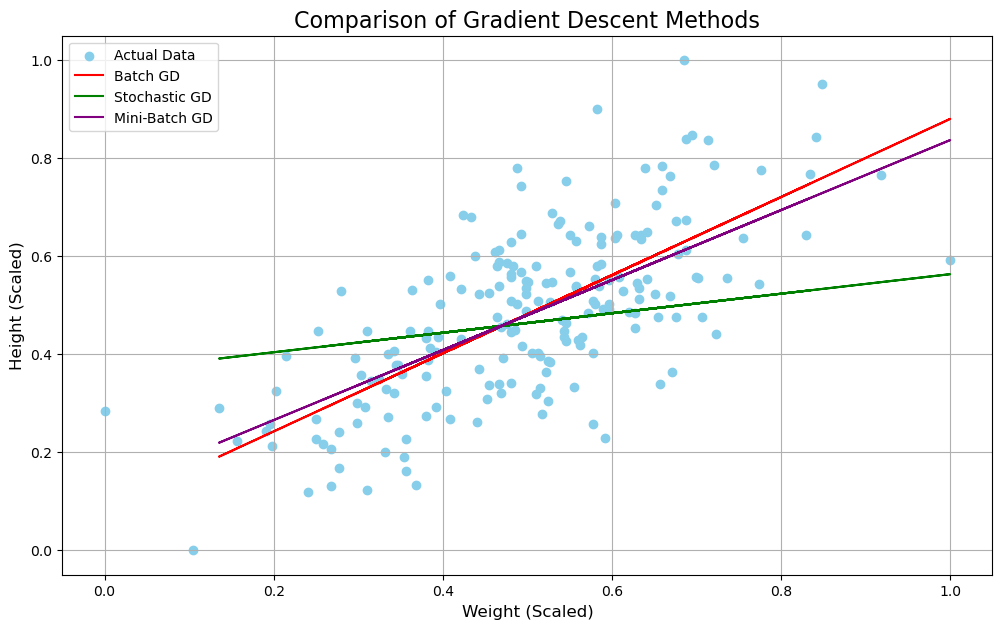

In [22]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='skyblue', label='Actual Data')
plt.plot(X_test.values, y_pred_batch.flatten(), color='red', label='Batch GD')
plt.plot(X_test.values, predictions_sgd.flatten(), color='green', label='Stochastic GD')
plt.plot(X_test.values, predictions_mb.flatten(), color='purple', label='Mini-Batch GD')

plt.title('Comparison of Gradient Descent Methods', fontsize=16)
plt.xlabel('Weight (Scaled)', fontsize=12)
plt.ylabel('Height (Scaled)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Overall Conclusion and Comparison

In this notebook, we successfully implemented all three major types of gradient descent from scratch and compared their performance on a simple linear regression task.

* **Batch Gradient Descent** proved to be the most accurate and stable method, achieving the lowest **MSE of 0.0189**. As shown in the comparison plot, its regression line provides the best fit to the overall data trend. However, its main drawback is computational cost, as it processes the entire dataset for every single update.

* **Stochastic Gradient Descent (SGD)** was less accurate, with a higher **MSE of 0.0230**. The visualization shows its final regression line is a noticeably poorer fit. This is because it updates its parameters based on single, noisy data points, making its convergence path erratic. Its primary advantage is speed on very large datasets.

* **Mini-Batch Gradient Descent** offered an excellent compromise, achieving a low **MSE of 0.0183** that is very close to the accuracy of the full Batch method. It provides a great balance between the stability of Batch GD and the speed of SGD, which is why it is the most common and practical implementation used in modern machine learning.